In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv


In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import nltk
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder

2021-10-06 11:18:18.907327: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0


# Importing Data and doing Basic Analysis

In [3]:
dataset = pd.read_csv("/kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv")
dataset.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
# Checking our target feature
np.unique(dataset.sentiment, return_counts=True)

(array(['negative', 'positive'], dtype=object), array([25000, 25000]))

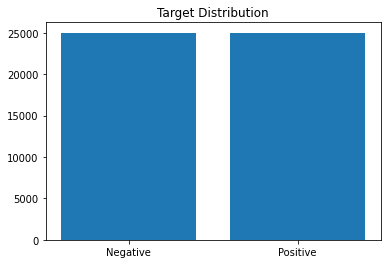

In [5]:
# Visualizing data distribution
target_count = dataset.groupby('sentiment').size().reset_index(name='counts')
plt.bar(target_count.sentiment, target_count.counts)
plt.xticks([0,1], labels=["Negative", "Positive"])
plt.title("Target Distribution")
plt.show()

### We have a Balanced Dataset

# Data Preprocessing

In [6]:
def preprocess(reviews):
    tokenizer = RegexpTokenizer(r'\w+')
    review = str(reviews)
    review = review.lower()
    review = review.replace("<br /><br />", "")
    tokens = tokenizer.tokenize(review)

    stop_words = set(stopwords.words('english'))
    stopwords_removed = [i for i in tokens if i not in stop_words]

    ps = PorterStemmer()
    stem_text = [ps.stem(i) for i in stopwords_removed]

    cleaned_reviews = " ".join(stem_text)
    
    return cleaned_reviews

In [7]:
X_preprocessed = [preprocess(i) for i in dataset.review]

le = LabelEncoder()

y = le.fit_transform(dataset.sentiment)

In [8]:
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1,3))
X = tfidf.fit_transform(X_preprocessed).toarray()

# Splitting the Data into Train and Test

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=10)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(40000, 5000) (40000,)
(10000, 5000) (10000,)


# Creating Different Models

In [10]:
# Creating NB models
model1 = MultinomialNB()
model2 = GaussianNB()
model3 = BernoulliNB()

In [11]:
model1.fit(X_train, y_train)
model2.fit(X_train, y_train)
model3.fit(X_train, y_train)

BernoulliNB()

In [12]:
model1_acc = model1.score(X_test,y_test)
model2_acc = model2.score(X_test,y_test)
model3_acc = model3.score(X_test, y_test)

In [13]:
print('Model 1 Train score', model1.score(X_train,y_train))
print('Model 1 Test score', model1.score(X_test,y_test))
print()
print('Model 2 Train score', model2.score(X_train,y_train))
print('Model 2 Test score', model2.score(X_test,y_test))
print()
print('Model 3 Train score', model3.score(X_train,y_train))
print('Model 3 Test score', model3.score(X_test,y_test))

Model 1 Train score 0.864975
Model 1 Test score 0.8559

Model 2 Train score 0.844275
Model 2 Test score 0.8234

Model 3 Train score 0.8624
Model 3 Test score 0.8546


In [14]:
# Creating Neural Network Model
model4 = Sequential()

model4.add(Dense(16, activation='relu', input_shape=(5000,)))
model4.add(Dense(16, activation='relu'))
model4.add(Dropout(0.2))
model4.add(Dense(1, activation='sigmoid'))

model4.summary()

2021-10-06 11:22:42.232301: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-10-06 11:22:42.236621: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-10-06 11:22:42.285591: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-06 11:22:42.286218: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla P100-PCIE-16GB computeCapability: 6.0
coreClock: 1.3285GHz coreCount: 56 deviceMemorySize: 15.90GiB deviceMemoryBandwidth: 681.88GiB/s
2021-10-06 11:22:42.286273: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2021-10-06 11:22:42.313947: I tensorflow/stream_executor/platform/def

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                80016     
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 80,305
Trainable params: 80,305
Non-trainable params: 0
_________________________________________________________________


In [15]:
model4.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [16]:
hist = model4.fit(X_train, y_train, batch_size=256, validation_data=(X_test, y_test), epochs=2)

2021-10-06 11:22:44.442521: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 800000000 exceeds 10% of free system memory.
2021-10-06 11:22:45.077944: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-10-06 11:22:45.089396: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2000179999 Hz


Epoch 1/2


2021-10-06 11:22:45.712280: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.11


 25/157 [===>..........................] - ETA: 0s - loss: 0.6887 - accuracy: 0.5920

2021-10-06 11:22:46.505454: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublasLt.so.11


157/157 [==============================] - 3s 10ms/step - loss: 0.6108 - accuracy: 0.7477 - val_loss: 0.3171 - val_accuracy: 0.8870
Epoch 2/2
157/157 [==============================] - 1s 5ms/step - loss: 0.2833 - accuracy: 0.8957 - val_loss: 0.2664 - val_accuracy: 0.8914


In [17]:
model4_acc = model4.evaluate(X_test, y_test)[1]

313/313 [==============================] - 1s 2ms/step - loss: 0.2664 - accuracy: 0.8914


# Visualizing different Model Accuracy

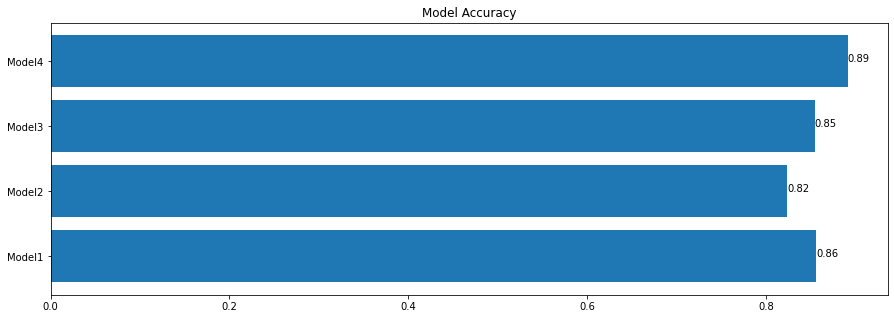

In [18]:
models = ['Model1', 'Model2', 'Model3', 'Model4']

acc = [model1_acc, model2_acc, model3_acc, model4_acc]

plt.figure(figsize=(15,5))
plt.barh(models, acc)
  
for index, value in enumerate(acc):
    plt.text(value, index,
             str("%.2f"%value))
plt.title("Model Accuracy")
plt.show()

# Conclusion

### We can conlcude from the above graph that Model 4 has the highest accuracy which is Neural Network Model
### Followed by Model 1 that is MultinomialNB